In [2]:
################# Import the necessary libraries ##################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score , classification_report, accuracy_score , confusion_matrix , ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier

In [4]:
'''Classification for the Customers: define high-value and low-value customers based on the monetary feature. 
High-Value: Monetary value above a certain threshold.
Low-Value: Monetary value below or equal to that threshold.'''

'Classification for the Customers: define high-value and low-value customers based on the monetary feature. \nHigh-Value: Monetary value above a certain threshold.\nLow-Value: Monetary value below or equal to that threshold.'

In [6]:
############### the RFM dataset ###############
path = r"D:\IBM Data Science\RFM_Project\RFM_Table_Creation\RFM_TABLE.csv"
rfm_df  = pd.read_csv(path , encoding = 'UTF-8')
rfm_df 

,customer_id,Recency,Frequency,Monetary
0,1,8,11,311649.95
1,2,129,3,89248.07
2,4,196,2,34414.86
3,5,17,6,131870.09
4,6,65,5,667852.69
...,...,...,...,...
3483,3496,257,4,82100.13
3484,3497,53,3,89047.96
3485,3498,128,6,108224.70
3486,3499,52,7,176842.95


In [8]:
# Define threshold (Median) for high-value and low-value customers
threshold = rfm_df['Monetary'].median()
rfm_df['high_value'] = (rfm_df['Monetary'] > threshold).astype(int)

# Features and target
X = rfm_df[['Recency', 'Frequency', 'Monetary']]
y = rfm_df['high_value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predict the target variable on the test set
y_pred = rf_model.predict(X_test_scaled)

In [10]:
# Evaluate the model using accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Evaluate the model using classification report
classification = classification_report(y_test, y_pred)
print("\nClassification Report:\n", classification)

# Evaluate the model using confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", confusion_mat)

Accuracy: 100.00%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       346
           1       1.00      1.00      1.00       352

    accuracy                           1.00       698
   macro avg       1.00      1.00      1.00       698
weighted avg       1.00      1.00      1.00       698


Confusion Matrix:
 [[346   0]
 [  0 352]]


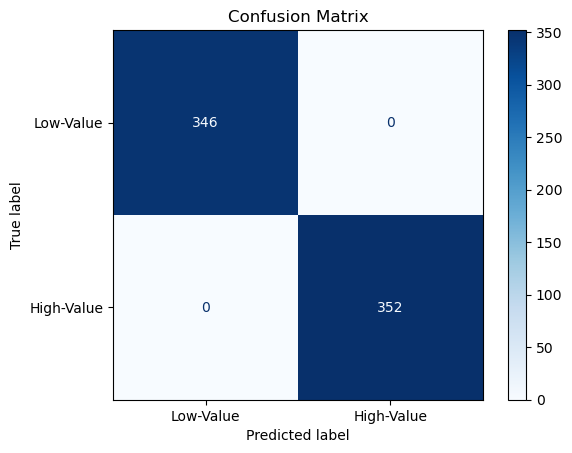

In [12]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Low-Value', 'High-Value'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()